# 📍 seaborn

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

### ✅ 히스토그램
: `sns.histplot(value, bins, kde=True/False, height=height, aspect=aspect)`

In [2]:
import pandas as pd

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


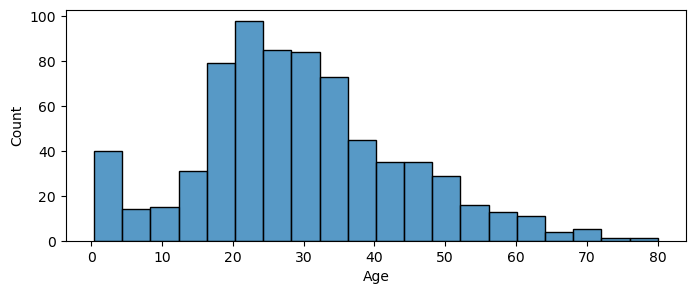

In [3]:
plt.figure(figsize=(8, 3))
sns.histplot(titanic_df['Age'], bins=20) # bins 나누는 갯수
plt.show()

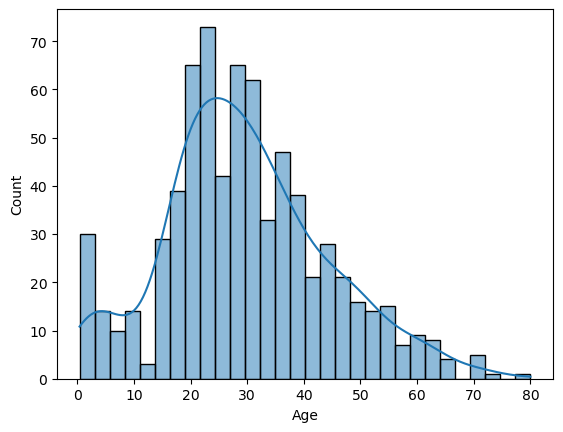

In [4]:
sns.histplot(x='Age', data=titanic_df, bins=30, kde=True) # kde : 밀도추정
plt.show()

/Users/heeju/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x400 with 0 Axes>

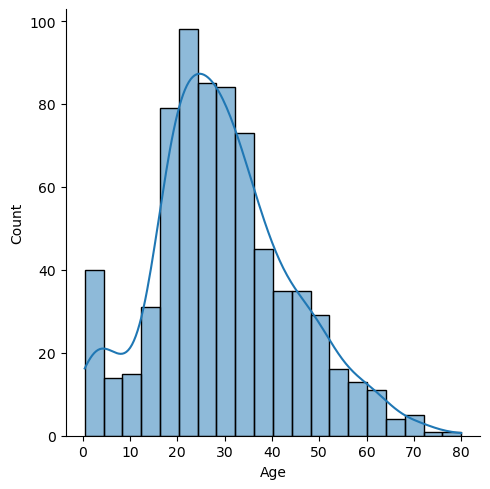

In [5]:
# figure로 조절이 안될 수 있음
plt.figure(figsize=(8, 4))
sns.displot(x='Age', data=titanic_df, kde=True)
plt.show()

/Users/heeju/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


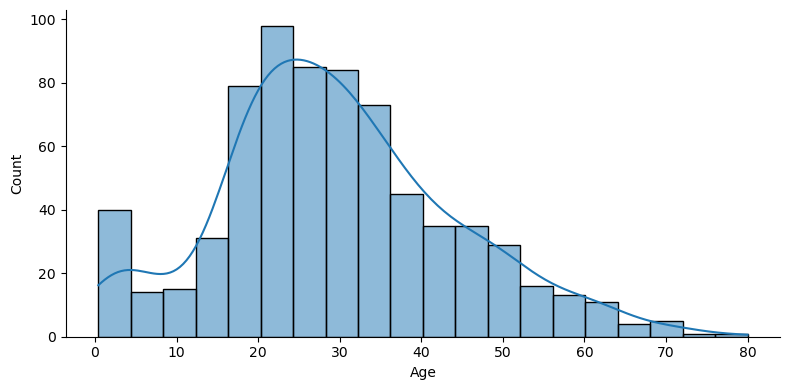

In [6]:
# height, aspect로 조정
sns.displot(titanic_df['Age'], kde=True, height=4, aspect=2)
plt.show()

### ✅ 카운트 플롯
: `sns.countplot(value)`\
`sns.countplot(x='column', data=df)`

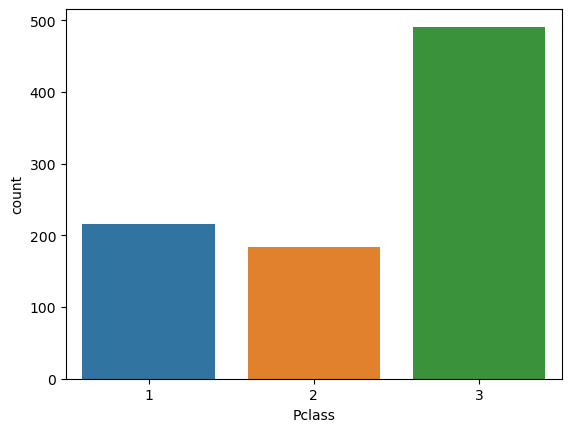

In [7]:
sns.countplot(x='Pclass', data=titanic_df)
plt.show()

### ✅ 바 플롯
: `sns.barplot(x, y, hue='colomn', errorbar, estimator)`
- errorbar : 오차막대, 신뢰도(95% 이상이 해당 범위)

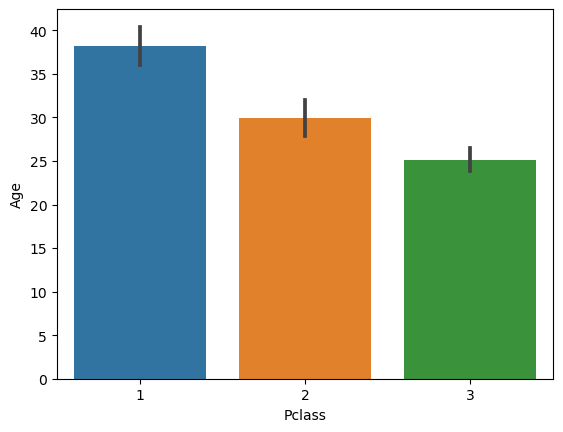

In [8]:
sns.barplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

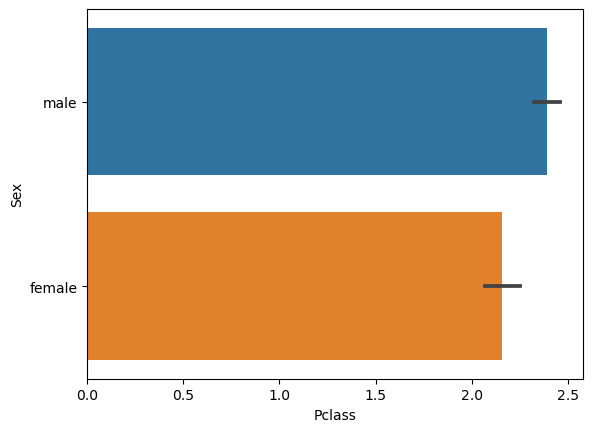

In [9]:
sns.barplot(x='Pclass', y='Sex', data=titanic_df) # y에 object 데이터가 올 시 자동으로 수평그래프 출력
plt.show()

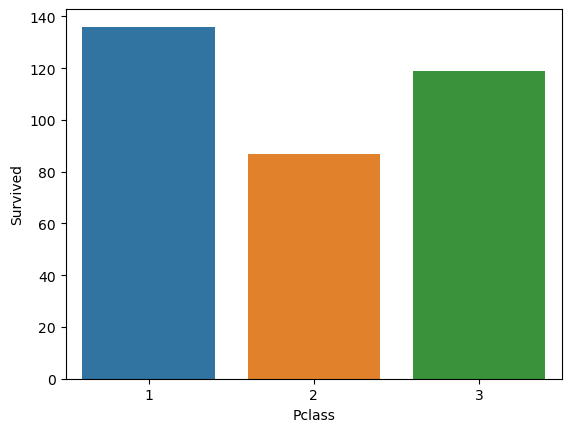

In [10]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df, errorbar=None, estimator=sum)
plt.show()

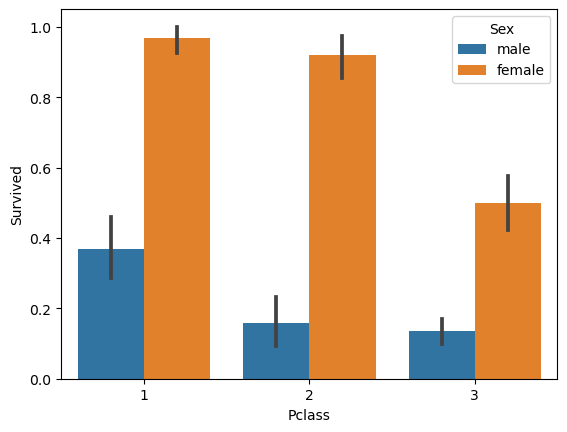

In [11]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
plt.show()

### ✅ 박스 플롯
: `sns.boxplot(x, y, hue='column')`

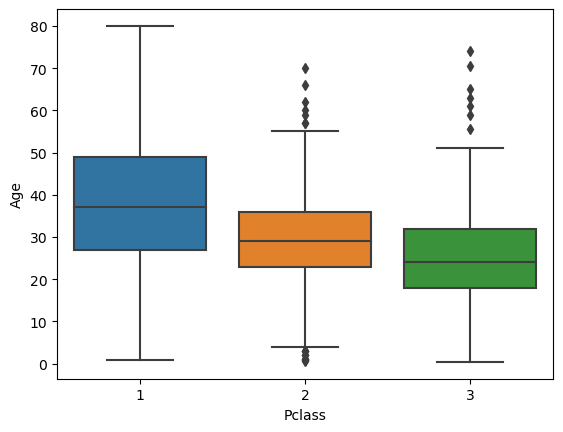

In [12]:
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

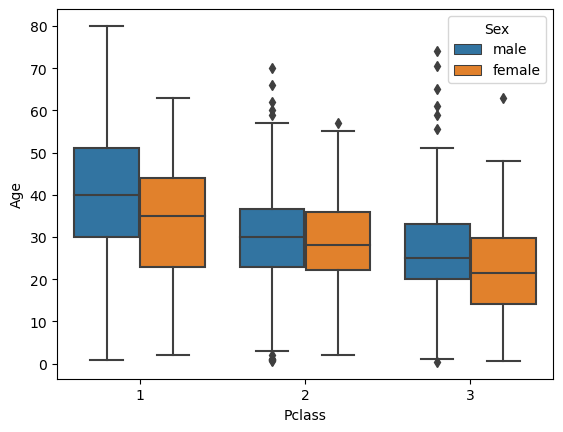

In [13]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

### ✅ 바이올린 플롯
: `sns.violinplot(x, y, hue='column')`

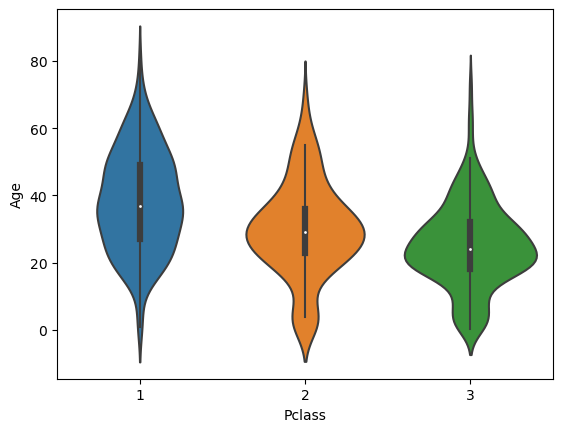

In [14]:
sns.violinplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

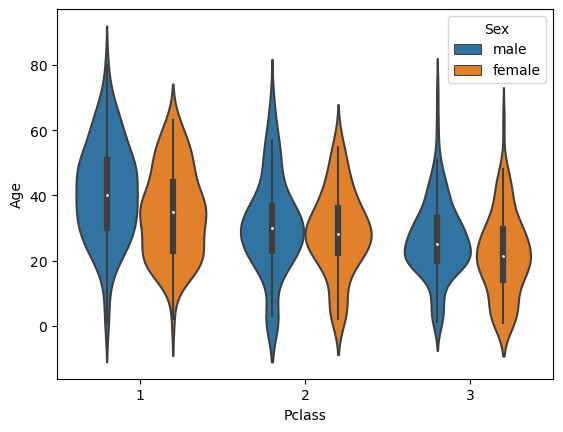

In [15]:
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

### ✅ 다중 플롯
: `fig, axs = plt.subplots(x, y, figsize=(x, y))`\
`sns.barplot(x, y, hue='column', ax=axs[n])`

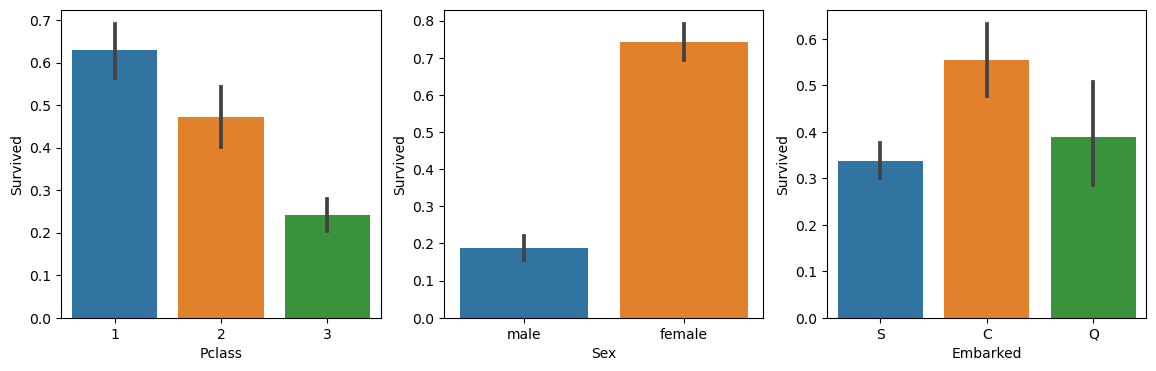

In [16]:
cat_columns = ['Pclass', 'Sex', 'Embarked']

fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14, 4))

for index, column in enumerate(cat_columns):
    sns.barplot(x=column, y='Survived', data=titanic_df, ax=axs[index])

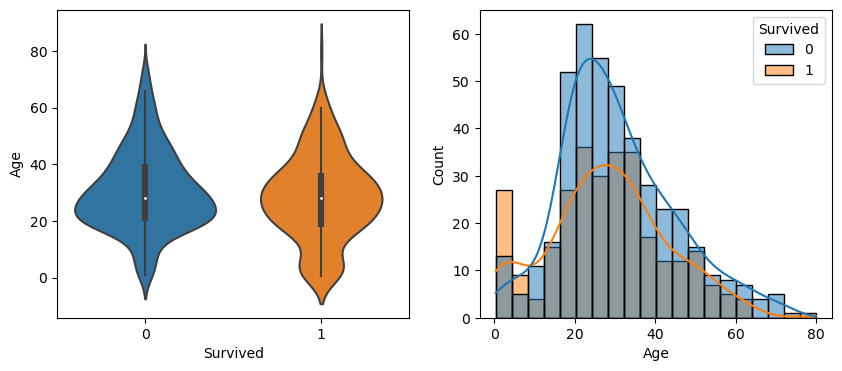

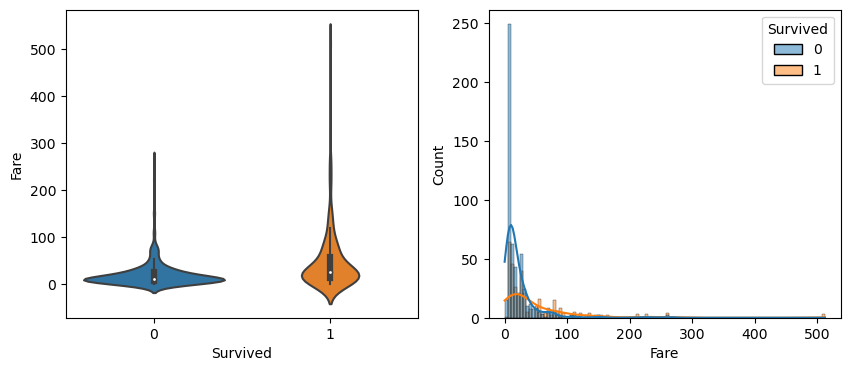

In [17]:
cont_columns = ['Age', 'Fare']

for column in cont_columns:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    sns.violinplot(x='Survived', y=column, data=titanic_df, ax=axs[0])
    sns.histplot(x=column, data=titanic_df, kde=True, hue='Survived', ax=axs[1])

### ✅ 산점도
: `sns.scatterplot(x, y, hue='column', style='column')`

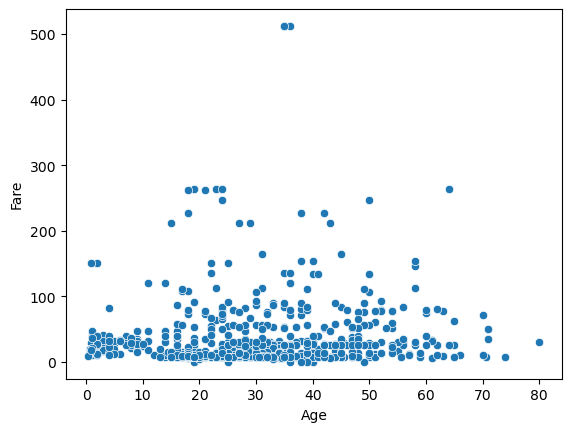

In [18]:
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.show()

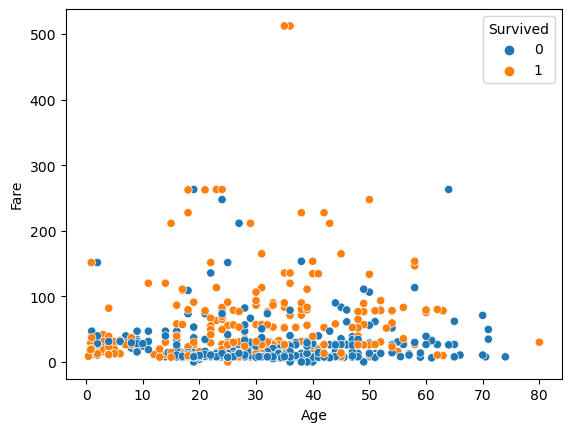

In [19]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.show()

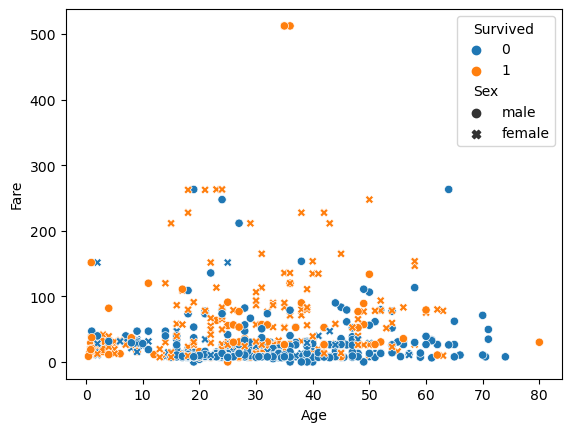

In [20]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Sex', data=titanic_df)
plt.show()

### ✅ 상관 히트맵
: `sns.heatmap(corr, annot=True/False, fmt='.1f', cbar=True/False)`

In [21]:
corr_df = titanic_df.corr(numeric_only=True)
corr_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


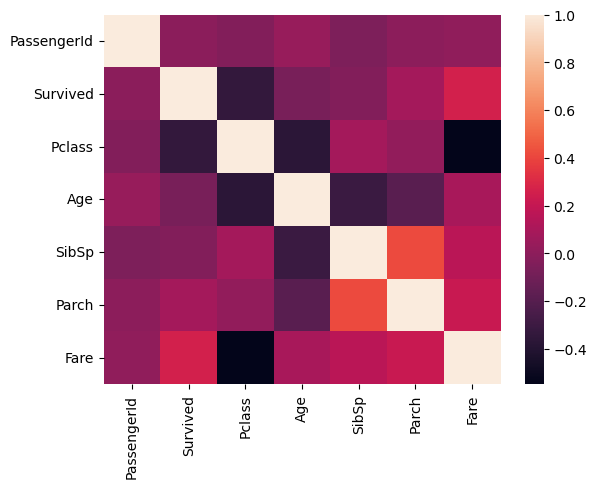

In [22]:
sns.heatmap(corr_df)
plt.show()

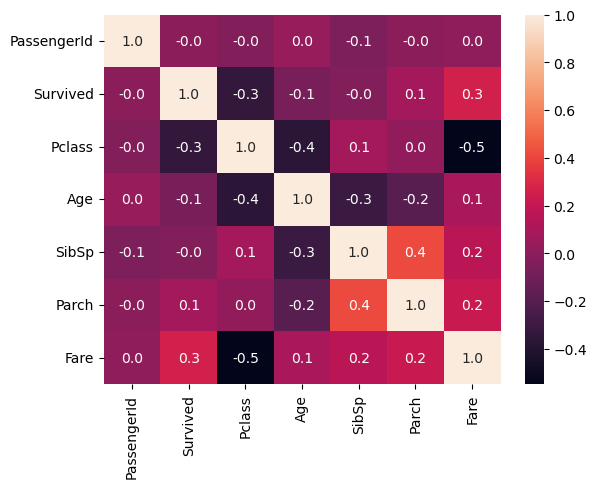

In [23]:
sns.heatmap(corr_df, annot=True, fmt='.1f', cbar=True) # annot : 수치 표시
plt.show()